<a href="https://colab.research.google.com/github/AliciaFalconCaro/LLM_Chatbot_Movies/blob/main/DataAnalysisForMovies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data downloaded from:
https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows/data?select=imdb_top_1000.csv


In [24]:
import pandas as pd
df = pd.read_csv("imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [25]:
# Let's first explore the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


The majority of the data information is non-numeric/text (categorical)
There is a total of 1000 entries.

In [26]:
#Let's check null values:
print("Missing values:", df.isnull().sum())

Missing values: Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


The features 'certificate', 'meta_score' and 'Gross' contains a high number of null values. We now check if all the missing values across the three features are from the same rows before deciding to drop the rows with missing values.

In [27]:
missing_certificates = df['Certificate'].isnull()
missing_gross = df['Gross'].isnull()
missing_MetaScore = df['Meta_score'].isnull()
# Find overlap
overlapFull = missing_certificates & missing_gross & missing_MetaScore
overlapCertGross = missing_certificates & missing_gross
# Count the overlapping rows
print("Number of overlapping missing values between 'Certificate', 'Gross' and 'Meta_Score':", overlapFull.sum())
print("Number of overlapping missing values between 'Certificate' and 'Gross':", overlapCertGross.sum())


Number of overlapping missing values between 'Certificate', 'Gross' and 'Meta_Score': 35
Number of overlapping missing values between 'Certificate' and 'Gross': 55


The description of Certificate is:This typically indicates the movie's age rating or certification (e.g., PG-13, R, etc.).
We analyse the type of movies associated with the missing certificate (focusing on if it could be due to be old movies)
We do the same for the Gross feature.

In [28]:
#we drop the 35 rows that have all three values in common since they are missing a considerable number of features.
df.dropna(subset=['Certificate', 'Gross', 'Meta_score'], how='all', inplace=True)
df.info()
print("Missing values:", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 965 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    965 non-null    object 
 1   Series_Title   965 non-null    object 
 2   Released_Year  965 non-null    object 
 3   Certificate    899 non-null    object 
 4   Runtime        965 non-null    object 
 5   Genre          965 non-null    object 
 6   IMDB_Rating    965 non-null    float64
 7   Overview       965 non-null    object 
 8   Meta_score     843 non-null    float64
 9   Director       965 non-null    object 
 10  Star1          965 non-null    object 
 11  Star2          965 non-null    object 
 12  Star3          965 non-null    object 
 13  Star4          965 non-null    object 
 14  No_of_Votes    965 non-null    int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 128.2+ KB
Missing values: Poster_Link        0
Series

In [29]:
# Display the rows with Certificate and gross missing values
missing_gross_rows = df[missing_gross]
missing_certificates_rows = df[missing_certificates]
print("For missing Gross",missing_gross_rows[['Series_Title', 'Released_Year', 'Director']])
print("For missing Certificates",missing_certificates_rows[['Series_Title', 'Released_Year', 'Director']])


For missing Gross                Series_Title Released_Year                Director
18                 Hamilton          2020             Thomas Kail
20          Soorarai Pottru          2020           Sudha Kongara
30                  Seppuku          1962        Masaki Kobayashi
32    It's a Wonderful Life          1946             Frank Capra
46           Hotaru no haka          1988           Isao Takahata
..                      ...           ...                     ...
993                  Blowup          1966  Michelangelo Antonioni
995  Breakfast at Tiffany's          1961           Blake Edwards
996                   Giant          1956          George Stevens
998                Lifeboat          1944        Alfred Hitchcock
999            The 39 Steps          1935        Alfred Hitchcock

[134 rows x 3 columns]
For missing Certificates             Series_Title Released_Year          Director
30               Seppuku          1962  Masaki Kobayashi
121                Ikiru   

<ipython-input-29-ac2f3ecb0564>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_gross_rows = df[missing_gross]
<ipython-input-29-ac2f3ecb0564>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_certificates_rows = df[missing_certificates]


The certificate and gross seem to be missing in older movies, but not always.

For the rows with missing certificates, we employ "imputation". We will fill the missing values with the value "NotProvided".

In [30]:
df['Certificate'].fillna('Not Provided', inplace=True)
missing_certificates_rows = df[missing_certificates]
print("For missing Certificates",missing_certificates_rows[['Series_Title', 'Released_Year', 'Certificate']])

For missing Certificates             Series_Title Released_Year   Certificate
30               Seppuku          1962  Not Provided
121                Ikiru          1952  Not Provided
122  Ladri di biciclette          1948  Not Provided
126           Metropolis          1927  Not Provided
138          Mandariinid          2013  Not Provided
..                   ...           ...           ...
920  The Secret of Kells          2009  Not Provided
926     Dead Man's Shoes          2004  Not Provided
944      Batoru rowaiaru          2000  Not Provided
998             Lifeboat          1944  Not Provided
999         The 39 Steps          1935  Not Provided

[66 rows x 3 columns]


<ipython-input-30-41317bb91864>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna('Not Provided', inplace=True)
<ipython-input-30-41317bb91864>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  missing_certificates_rows = df[missing_certificates]


For the missing values in the Gross feature, instead of dropping, we will provide the average value for similar movies from the same year, same director (if there is) or same rating. We first analyse the crosscorrelation of Gross and these three features to decide which one seems most appropriate to be used.

The features "released_year" and "gross" are given as categorical instead of numeric, so we analyse this values first.

In [31]:
# Check for non-numeric values before conversion
non_numeric_year = df[~df['Released_Year'].apply(pd.to_numeric, errors='coerce').notnull()]

# Display the rows where 'Year' is non-numeric
print(non_numeric_year[['Series_Title', 'Released_Year','Director', 'Certificate']])

#we identify that one row is non-numeric.

    Series_Title Released_Year    Director Certificate
966    Apollo 13            PG  Ron Howard           U


The movie without a released year is a well-known movie. Under year feature, it was assigned "PG" instead. We assign this movie with the correct released year: (after checking on google). This way, we avoid having to remove the row for incomplete/wrong data.

In [35]:
# Assign a specific value to the 'Year' column of a row where 'Title' is a certain movie
df.loc[df['Series_Title'] == 'Apollo 13', 'Released_Year'] = 1995

# Check for non-numeric values before conversion
non_numeric_year = df[~df['Released_Year'].apply(pd.to_numeric, errors='coerce').notnull()]

# Display the rows where 'Year' is non-numeric
print(non_numeric_year[['Series_Title', 'Released_Year','Director', 'Certificate']])

Empty DataFrame
Columns: [Series_Title, Released_Year, Director, Certificate]
Index: []


In [36]:
# Check for non-numeric values before conversion
non_numeric_Gross = df[~df['Gross'].apply(pd.to_numeric, errors='coerce').notnull()]

# Display the rows where 'Gross' is non-numeric
print(non_numeric_Gross[['Series_Title', 'Released_Year','Director', 'Gross']])

                 Series_Title Released_Year              Director        Gross
0    The Shawshank Redemption          1994        Frank Darabont   28,341,469
1               The Godfather          1972  Francis Ford Coppola  134,966,411
2             The Dark Knight          2008     Christopher Nolan  534,858,444
3      The Godfather: Part II          1974  Francis Ford Coppola   57,300,000
4                12 Angry Men          1957          Sidney Lumet    4,360,000
..                        ...           ...                   ...          ...
995    Breakfast at Tiffany's          1961         Blake Edwards          NaN
996                     Giant          1956        George Stevens          NaN
997     From Here to Eternity          1953        Fred Zinnemann   30,500,000
998                  Lifeboat          1944      Alfred Hitchcock          NaN
999              The 39 Steps          1935      Alfred Hitchcock          NaN

[965 rows x 4 columns]


In [44]:
#We drop the NaN values for Gross
df.dropna(subset=['Gross'], inplace=True)

#convert year to numeric values
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
print("Missing values:\n", df.isnull().sum())
df.info()

Missing values:
 Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score        81
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
Year             830
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 831 entries, 0 to 997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    831 non-null    object 
 1   Series_Title   831 non-null    object 
 2   Released_Year  831 non-null    int64  
 3   Certificate    831 non-null    object 
 4   Runtime        831 non-null    object 
 5   Genre          831 non-null    object 
 6   IMDB_Rating    831 non-null    float64
 7   Overview       831 non-null    object 
 8   Meta_score     750 non-null    float64
 9   Director       831 non-n

We decide to drop the rows for the missing meta_score

In [45]:
df.dropna(subset=['Meta_score'], inplace=True)
print("Missing values:\n", df.isnull().sum())

Missing values:
 Poster_Link        0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
Year             749
dtype: int64


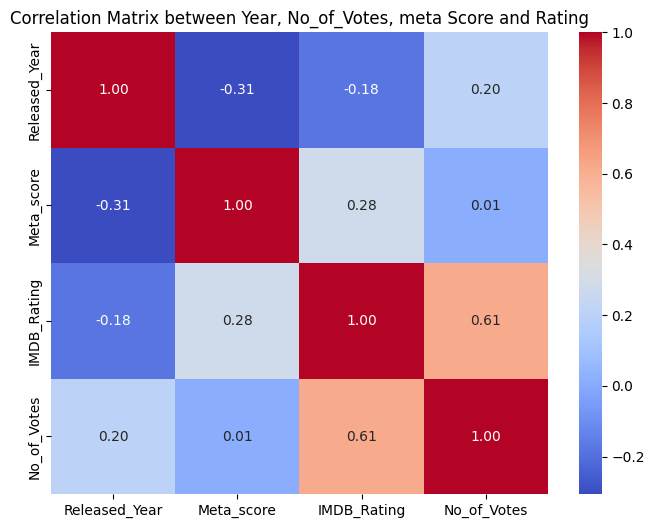

In [50]:
#We start by analysing the correlation between the Rating and different important numeric features
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Pearson correlation matrix for numeric columns
corr_matrix = df[['Released_Year','Meta_score','IMDB_Rating','No_of_Votes']].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix between Year, No_of_Votes, meta Score and Rating')
plt.show()

We now analyse the correlation between the ratings and the gender, the runtime and gross. Since they are non-numeric, we employ one-hot encoding first.

In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Director_encoded'] = label_encoder.fit_transform(df['Director'])
df['runtime_encoded'] = label_encoder.fit_transform(df['Runtime'])
df['Genre_encoded'] = label_encoder.fit_transform(df['Genre'])
df['Gross_encoded'] = label_encoder.fit_transform(df['Gross'])

df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Star2,Star3,Star4,No_of_Votes,Gross,Year,Director_encoded,runtime_encoded,Genre_encoded,Gross_encoded
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,...,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",NaN,110,42,118,349
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,...,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",NaN,106,72,106,130
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,...,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",NaN,61,52,18,578
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,...,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",NaN,106,89,106,603
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,...,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",NaN,358,117,106,465


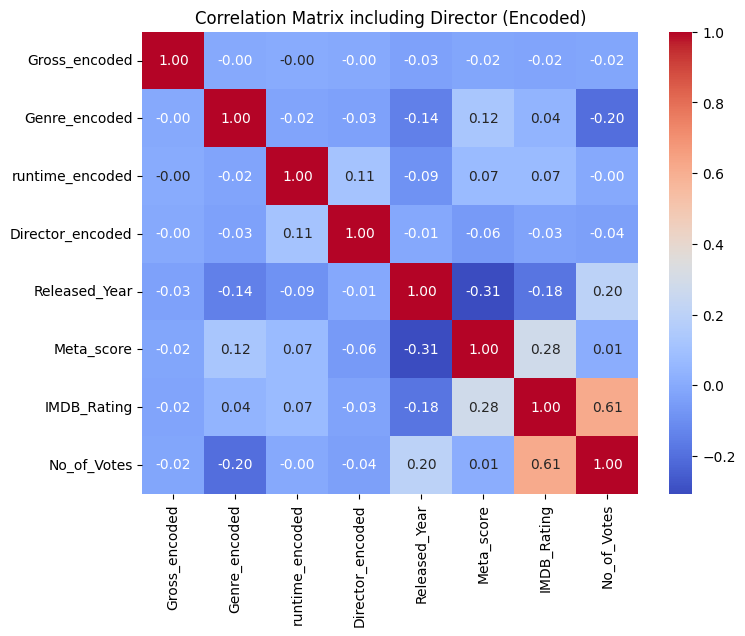

In [54]:
# Now, calculate the correlation matrix including the 'Director_encoded' column
correlation_with_director = df[['Gross_encoded', 'Genre_encoded', 'runtime_encoded', 'Director_encoded', 'Released_Year','Meta_score','IMDB_Rating','No_of_Votes']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_director, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix including Director (Encoded)')
plt.show()

Now we perform some basic descriptive statistics

In [55]:
# Summary of numerical columns
print("Numerical Columns Summary:")
print(df.describe())

# Count unique genres and directors
print("Unique Genres:", df['Genre'].nunique())
print("Unique Directors:", df['Director'].nunique())


Numerical Columns Summary:
       Released_Year  IMDB_Rating  Meta_score   No_of_Votes    Year  \
count     750.000000   750.000000  750.000000  7.500000e+02     1.0   
mean     1995.070667     7.934800   77.460000  3.421327e+05  1995.0   
std        19.496029     0.289103   12.493967  3.509795e+05     NaN   
min      1925.000000     7.600000   28.000000  2.519800e+04  1995.0   
25%      1986.000000     7.700000   70.000000  8.854725e+04  1995.0   
50%      2001.000000     7.900000   78.000000  2.197340e+05  1995.0   
75%      2010.000000     8.100000   86.000000  4.812185e+05  1995.0   
max      2019.000000     9.300000  100.000000  2.343110e+06  1995.0   

       Director_encoded  runtime_encoded  Genre_encoded  Gross_encoded  
count        750.000000       750.000000     750.000000     750.000000  
mean         210.554667        41.633333      86.797333     372.773333  
std          127.362184        36.507880      47.174805     214.972981  
min            0.000000         0.000000 

We analyse the most common and highly rated genres.

Some movies can have more than one genre:
*   we use "str.split(',')" to generate a list containing all the genres per movie (and row).
*   we use explode to separate each row containing multiple genres into multiple rows, one per genre

In [56]:
from collections import Counter
import matplotlib.pyplot as plt

# Split genre strings into lists and count occurrences
all_genres = df['Genre'].str.split(', ').explode()
genre_counts = Counter(all_genres)
print("Ocurrences per genre",genre_counts)


Ocurrences per genre Counter({'Drama': 531, 'Comedy': 166, 'Adventure': 165, 'Crime': 151, 'Action': 143, 'Thriller': 104, 'Romance': 91, 'Biography': 88, 'Mystery': 73, 'Animation': 64, 'Sci-Fi': 58, 'Fantasy': 55, 'Family': 45, 'History': 39, 'War': 33, 'Music': 28, 'Horror': 21, 'Sport': 17, 'Western': 16, 'Musical': 11, 'Film-Noir': 8})


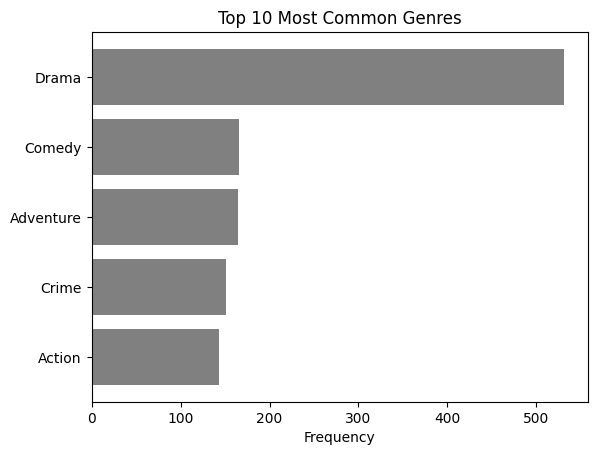

In [60]:
# Plot the top 5 genres
top_genres = genre_counts.most_common(5)
genres, counts = zip(*top_genres)

#zip(*top_genres) is used to unpack the list of tuples into two separate lists.
#The first list genres contains all the genre names (e.g., ['Action', 'Comedy', ...]), and the second list counts contains the corresponding counts (e.g., [120, 100, ...]).

plt.barh(genres, counts, color='Grey') #to generate a bar graph
plt.xlabel("Frequency")
plt.title("Top 5 Most Common Genres")
plt.gca().invert_yaxis()
plt.show()

Highest rated movies based on the IMDB Rating and the Meta_Score:

In [63]:
# Sort by IMDb rating and display the top movies
top_rated = df.sort_values(by='IMDB_Rating', ascending=False).head(10)
print("Top 10 Movies by IMDb Rating:")
print(top_rated[['Series_Title', 'IMDB_Rating', 'Director', 'Genre']])

# Sort by meta_score to get top-voted movies
top_voted = df.sort_values(by='Meta_score', ascending=False).head(10)
print("\nTop 10 Movies by Meta_score Rating:")
print(top_voted[['Series_Title', 'Meta_score', 'Director', 'Genre']])


Top 10 Movies by IMDb Rating:
                                         Series_Title  IMDB_Rating  \
0                            The Shawshank Redemption          9.3   
1                                       The Godfather          9.2   
2                                     The Dark Knight          9.0   
3                              The Godfather: Part II          9.0   
4                                        12 Angry Men          9.0   
5       The Lord of the Rings: The Return of the King          8.9   
6                                        Pulp Fiction          8.9   
7                                    Schindler's List          8.9   
10  The Lord of the Rings: The Fellowship of the Ring          8.8   
12                    Il buono, il brutto, il cattivo          8.8   

                Director                      Genre  
0         Frank Darabont                      Drama  
1   Francis Ford Coppola               Crime, Drama  
2      Christopher Nolan       Action

We check the Directors with major number of movies:

Top 10 Directors by Movie Count:
Director
Steven Spielberg     13
Martin Scorsese      10
Alfred Hitchcock      9
Christopher Nolan     8
Clint Eastwood        8
Quentin Tarantino     8
David Fincher         8
Rob Reiner            7
Hayao Miyazaki        7
Woody Allen           7
Name: count, dtype: int64


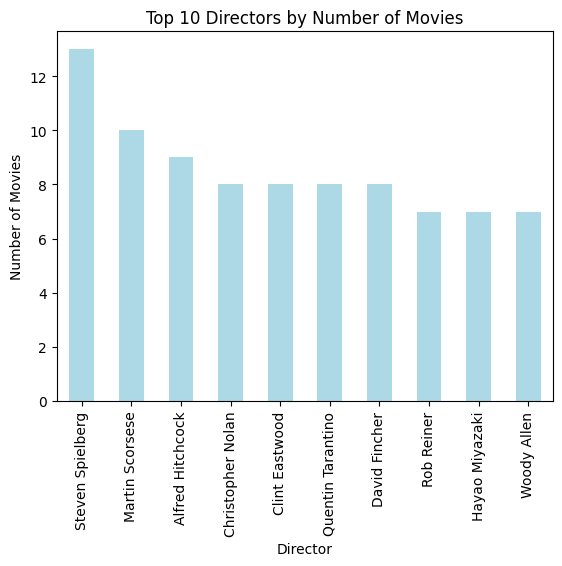

In [66]:
director_counts = df['Director'].value_counts()

# Display the top 10 directors
print("Top 10 Directors by Movie Count:")
print(director_counts.head(10))

director_counts.head(10).plot(kind='bar', color='lightblue')
plt.ylabel("Number of Movies")
plt.title("Top 10 Directors by Number of Movies")
plt.show()


We check how many movies where released per year:

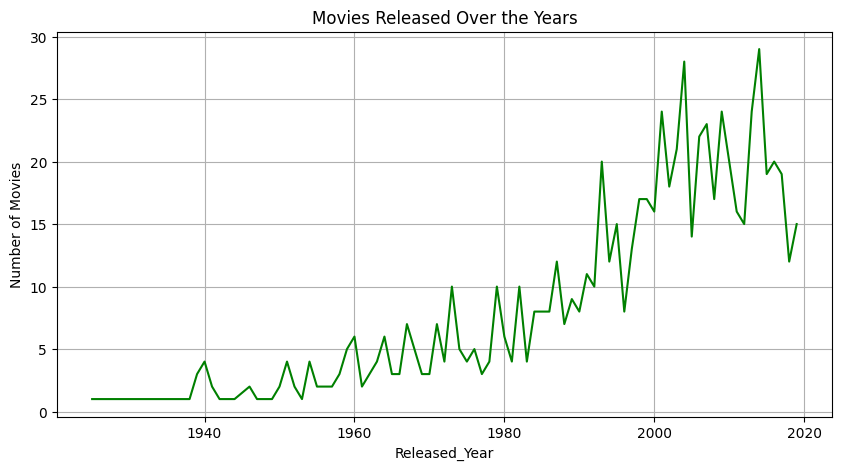

In [67]:
# Group by year and count movies
movies_per_year = df.groupby('Released_Year')['Series_Title'].count()

# Plot the trend
movies_per_year.plot(kind='line', figsize=(10, 5), color='green')
plt.ylabel("Number of Movies")
plt.title("Movies Released Over the Years")
plt.grid()
plt.show()


In [ ]:
#we combine this graph with the graph of the average rating of the movies per year.

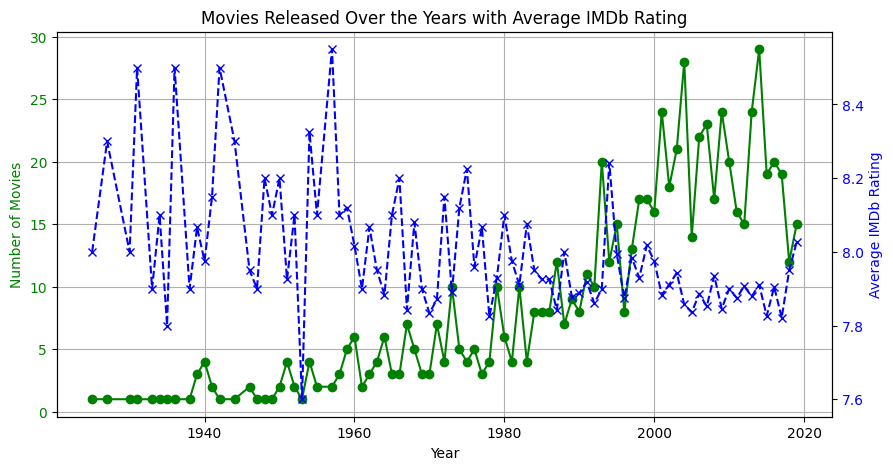

In [68]:
# Group by year and count the number of movies
movies_per_year = df.groupby('Released_Year')['Series_Title'].count()

# Group by year and calculate the average IMDb rating
avg_rating_per_year = df.groupby('Released_Year')['IMDB_Rating'].mean()

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the number of movies on the first y-axis
ax1.plot(movies_per_year.index, movies_per_year.values, color='green', label='Number of Movies', linestyle='-', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Movies', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis to plot the average ratings
ax2 = ax1.twinx()
ax2.plot(avg_rating_per_year.index, avg_rating_per_year.values, color='blue', label='Average IMDb Rating', linestyle='--', marker='x')
ax2.set_ylabel('Average IMDb Rating', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title and grid
plt.title('Movies Released Over the Years with Average IMDb Rating')
ax1.grid(True)

# Show the plot
plt.show()


# Let's now look at the descriptions of the movies.

We generate a word cloud with the most common words used in movies overviews

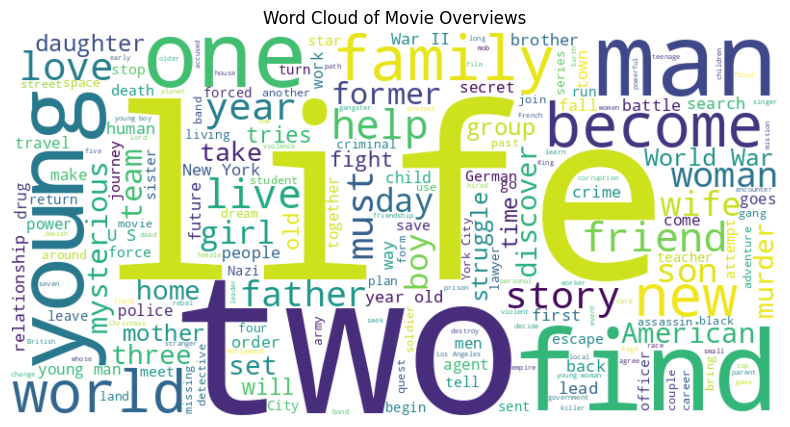

In [69]:
from wordcloud import WordCloud

# Combine all overviews into a single string
all_overviews = " ".join(df['Overview'].tolist())
#tolist():Converts the "Overview" column into a list of strings (each string is an overview for a movie).
#" ".join(...): Joins all the individual overviews into a single string, where each overview is separated by a space. This forms one long string containing all the movie descriptions

# Generate and plot the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_overviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Overviews")
plt.show()
